In [135]:
# Harness wide constants

data_folder = "./data"

# We'll use the portugese marks as the test dataset at the end. 
dataset_1_name = "student-mat.csv"
dataset_2_name = "student-por.csv"

In [136]:
# General imports

import numpy as np
import pandas as pd

import sys
np.set_printoptions(threshold=sys.maxsize)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", -1)

<ipython-input-136-1e2ab17237e6>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [137]:
# Read in the data

data_delimiter=";"

data = pd.read_csv(data_folder + "/" + dataset_1_name, delimiter=data_delimiter)
data_2 = pd.read_csv(data_folder + "/" + dataset_2_name, delimiter=data_delimiter)

data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  

In [138]:
data["G3"].min(),data["G3"].max()

(0, 20)

<ipython-input-52-6d5874c8c7f0>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


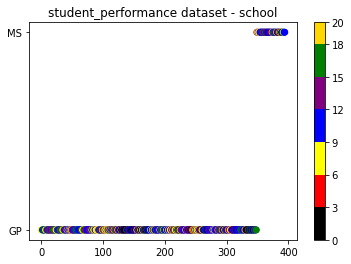

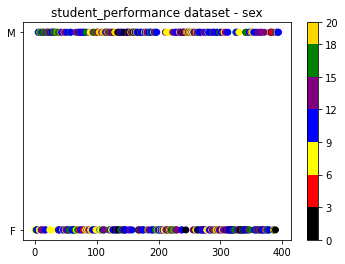

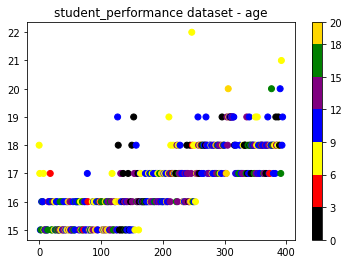

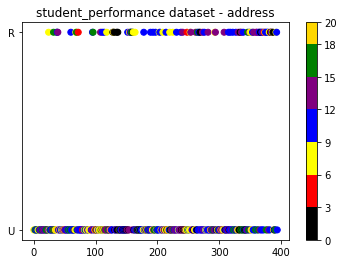

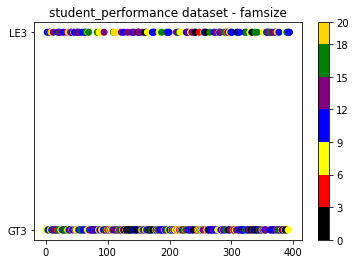

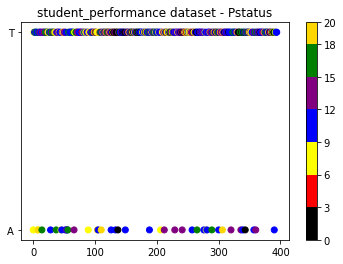

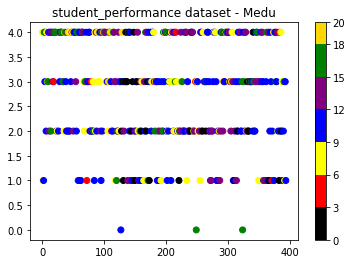

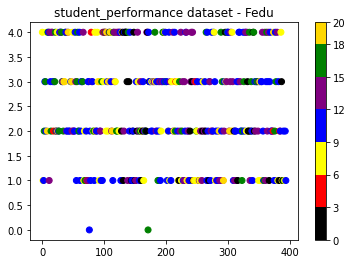

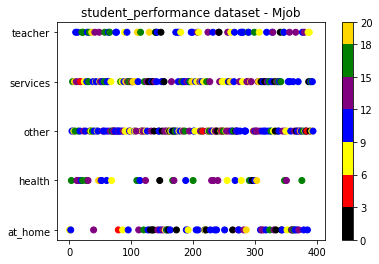

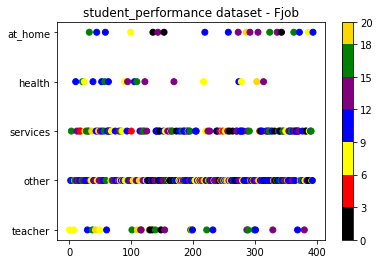

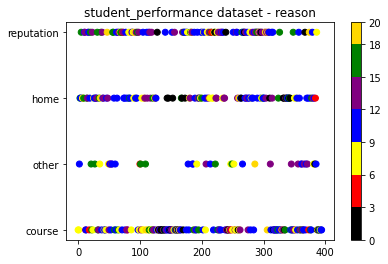

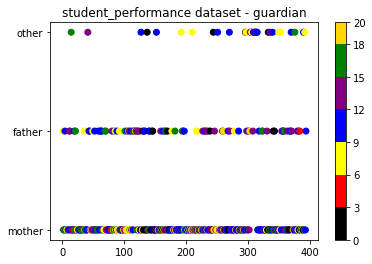

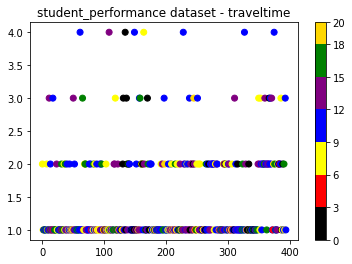

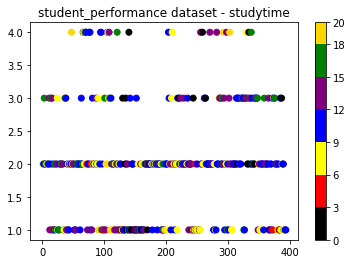

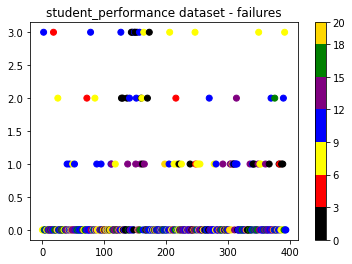

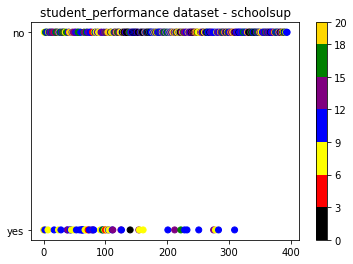

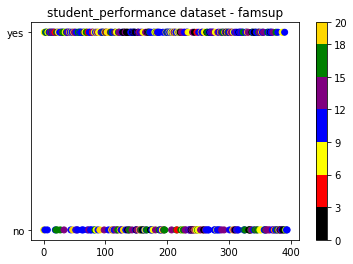

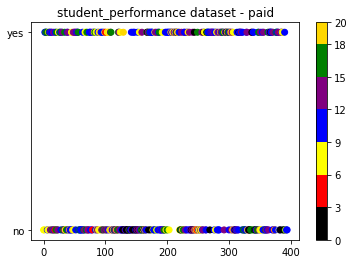

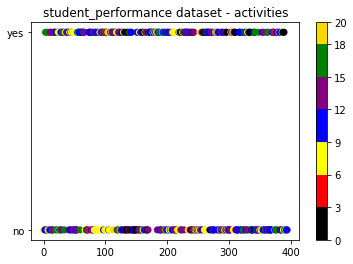

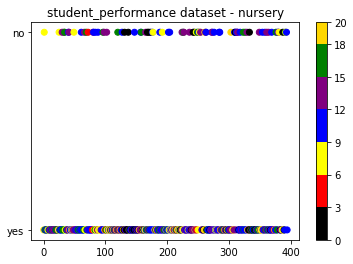

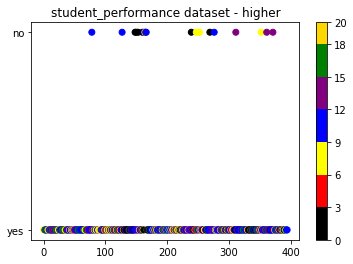

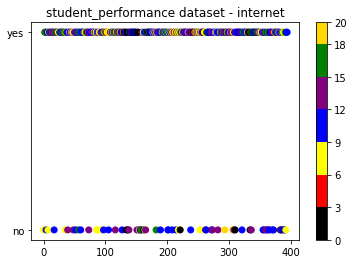

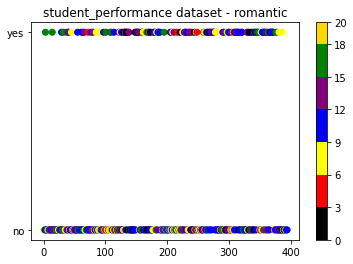

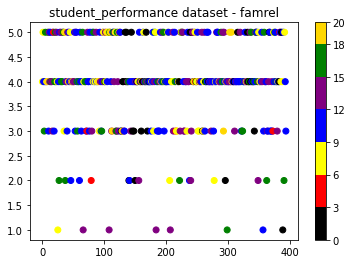

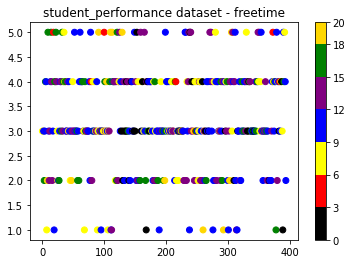

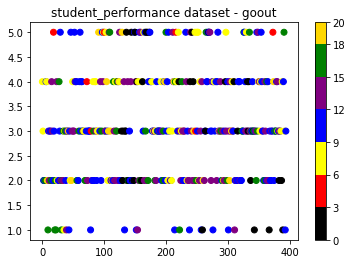

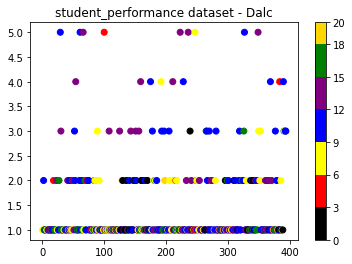

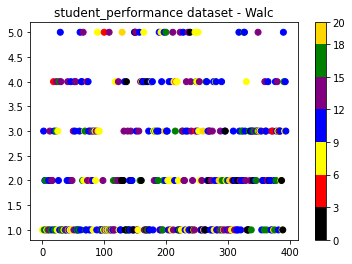

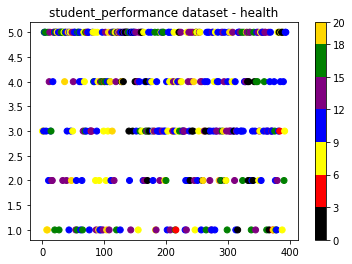

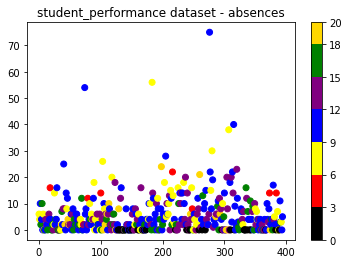

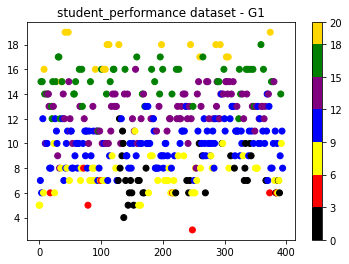

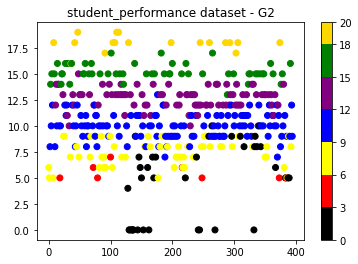

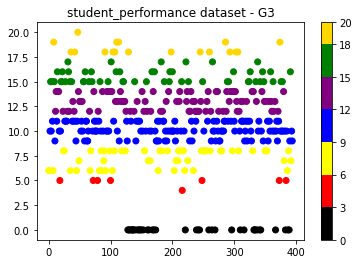

In [52]:
# Data plotting

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

data_boundaries = [0,3,6,9,12,15,18,20]
data_colors = ["black","red","yellow","blue","purple","green","gold"]
cmap = ListedColormap(data_colors)
norm = BoundaryNorm(data_boundaries, len(data_colors))

def graph_attribute(data, dataset_name, attribute, solution):
    fig, ax = plt.subplots()
    ax.title.set_text(dataset_name + " dataset - " + attribute)
    sc = ax.scatter(data.index, data[attribute], c=data[solution], cmap=cmap, norm= norm)
    fig.colorbar(sc, spacing = "proportional")

for attribute in data:
    graph_attribute(data, "student_performance", attribute, "G3")

In [240]:
# Data preparation

# Choose a variant between 1, 2, and 3. 
dataset_variant = 2

X = None
Y = None

if dataset_variant == 1:
    data_numpy = data.to_numpy()
    
    X = data_numpy[:,0:30]
    Y = data_numpy[:,32].astype("float")
elif dataset_variant == 2:
    data_numpy = data_2.to_numpy()
    
    X = data_numpy[:,0:30]
    Y = data_numpy[:,32].astype("float")
else:
    data_numpy = data.to_numpy()
    
    X_1 = data_numpy[:,0:30]
    Y_1 = data_numpy[:,32]
    
    data_numpy = data_2.to_numpy()
    
    X_2 = data_numpy[:,0:30]
    Y_2 = data_numpy[:,32]
    
    X = np.concatenate((X_1, X_2), axis=0)
    Y = np.concatenate((Y_1, Y_2), axis=0).astype("float")

In [250]:
# Label Encoder for X

from sklearn.preprocessing import LabelEncoder

data_rows, data_cols = X.shape

for i in range(0,data_cols):
    encoder = LabelEncoder()
    X[:,i] = encoder.fit_transform(X[:,i])

X = X.astype("float")

In [245]:
# Neural Network - Creation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

epochs = 150
batch_size=32

def baseline_nn_model():
    model = Sequential()
    model.add(Dense(16, input_dim = data_cols, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    return model

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

estimators = []
estimators.append(("standardize",StandardScaler()))
estimators.append(("mlp",KerasRegressor(build_fn=baseline_nn_model, epochs=epochs, batch_size=batch_size)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True)

In [246]:
# Neural Network - Evaluation
result_nn = cross_val_score(pipeline, X, Y, cv=kfold)

Epoch 1/150
19/19 [==============================] - 0s 1ms/step - loss: 165.9937 - mse: 165.9937
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 157.7531 - mse: 157.7531
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 150.0747 - mse: 150.0747
Epoch 4/150
19/19 [==============================] - 0s 992us/step - loss: 142.6442 - mse: 142.6442
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 135.4951 - mse: 135.4951
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 128.5766 - mse: 128.5766
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 121.6669 - mse: 121.6669
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 114.8853 - mse: 114.8853
Epoch 9/150
19/19 [==============================] - 0s 2ms/step - loss: 108.1869 - mse: 108.1869
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 101.4962 - mse: 101.4962
Epoch 11/150
19/1

19/19 [==============================] - 0s 1ms/step - loss: 7.3424 - mse: 7.3424
Epoch 86/150
19/19 [==============================] - 0s 1ms/step - loss: 7.3004 - mse: 7.3004
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 7.2410 - mse: 7.2410
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 7.1886 - mse: 7.1886
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 7.1415 - mse: 7.1415
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 7.0932 - mse: 7.0932
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 7.0497 - mse: 7.0497
Epoch 92/150
19/19 [==============================] - 0s 1ms/step - loss: 7.0010 - mse: 7.0010
Epoch 93/150
19/19 [==============================] - 0s 985us/step - loss: 6.9506 - mse: 6.9506
Epoch 94/150
19/19 [==============================] - 0s 988us/step - loss: 6.9011 - mse: 6.9011
Epoch 95/150
19/19 [==============================] - 0s 1m

19/19 [==============================] - 0s 990us/step - loss: 74.3091 - mse: 74.3091
Epoch 19/150
19/19 [==============================] - 0s 1ms/step - loss: 69.1194 - mse: 69.1194
Epoch 20/150
19/19 [==============================] - 0s 1ms/step - loss: 64.0596 - mse: 64.0596
Epoch 21/150
19/19 [==============================] - 0s 1ms/step - loss: 59.2136 - mse: 59.2136
Epoch 22/150
19/19 [==============================] - 0s 985us/step - loss: 54.6387 - mse: 54.6387
Epoch 23/150
19/19 [==============================] - 0s 979us/step - loss: 50.2684 - mse: 50.2684
Epoch 24/150
19/19 [==============================] - 0s 941us/step - loss: 46.1776 - mse: 46.1776
Epoch 25/150
19/19 [==============================] - 0s 962us/step - loss: 42.4072 - mse: 42.4072
Epoch 26/150
19/19 [==============================] - 0s 977us/step - loss: 38.8799 - mse: 38.8799
Epoch 27/150
19/19 [==============================] - 0s 999us/step - loss: 35.6893 - mse: 35.6893
Epoch 28/150
19/19 [=========

19/19 [==============================] - 0s 939us/step - loss: 6.8902 - mse: 6.8902
Epoch 103/150
19/19 [==============================] - 0s 987us/step - loss: 6.8422 - mse: 6.8422
Epoch 104/150
19/19 [==============================] - 0s 968us/step - loss: 6.8008 - mse: 6.8008
Epoch 105/150
19/19 [==============================] - 0s 951us/step - loss: 6.7610 - mse: 6.7610
Epoch 106/150
19/19 [==============================] - 0s 988us/step - loss: 6.7109 - mse: 6.7109
Epoch 107/150
19/19 [==============================] - 0s 963us/step - loss: 6.6676 - mse: 6.6676
Epoch 108/150
19/19 [==============================] - 0s 939us/step - loss: 6.6294 - mse: 6.6294
Epoch 109/150
19/19 [==============================] - 0s 963us/step - loss: 6.5893 - mse: 6.5893
Epoch 110/150
19/19 [==============================] - 0s 965us/step - loss: 6.5469 - mse: 6.5469
Epoch 111/150
19/19 [==============================] - 0s 1ms/step - loss: 6.5075 - mse: 6.5075
Epoch 112/150
19/19 [===============

19/19 [==============================] - 0s 995us/step - loss: 30.2285 - mse: 30.2285
Epoch 35/150
19/19 [==============================] - 0s 967us/step - loss: 27.9884 - mse: 27.9884
Epoch 36/150
19/19 [==============================] - 0s 996us/step - loss: 26.0122 - mse: 26.0122
Epoch 37/150
19/19 [==============================] - 0s 971us/step - loss: 24.3195 - mse: 24.3195
Epoch 38/150
19/19 [==============================] - 0s 960us/step - loss: 22.6857 - mse: 22.6857
Epoch 39/150
19/19 [==============================] - 0s 969us/step - loss: 21.3599 - mse: 21.3599
Epoch 40/150
19/19 [==============================] - 0s 980us/step - loss: 20.1470 - mse: 20.1470
Epoch 41/150
19/19 [==============================] - 0s 960us/step - loss: 19.1238 - mse: 19.1238
Epoch 42/150
19/19 [==============================] - 0s 964us/step - loss: 18.2024 - mse: 18.2024
Epoch 43/150
19/19 [==============================] - 0s 942us/step - loss: 17.4379 - mse: 17.4379
Epoch 44/150
19/19 [===

19/19 [==============================] - 0s 970us/step - loss: 7.5734 - mse: 7.5734
Epoch 118/150
19/19 [==============================] - 0s 990us/step - loss: 7.5295 - mse: 7.5295
Epoch 119/150
19/19 [==============================] - 0s 994us/step - loss: 7.4798 - mse: 7.4798
Epoch 120/150
19/19 [==============================] - 0s 966us/step - loss: 7.4482 - mse: 7.4482
Epoch 121/150
19/19 [==============================] - 0s 973us/step - loss: 7.4094 - mse: 7.4094
Epoch 122/150
19/19 [==============================] - 0s 1ms/step - loss: 7.3683 - mse: 7.3683
Epoch 123/150
19/19 [==============================] - 0s 956us/step - loss: 7.3279 - mse: 7.3279
Epoch 124/150
19/19 [==============================] - 0s 962us/step - loss: 7.2912 - mse: 7.2912
Epoch 125/150
19/19 [==============================] - 0s 972us/step - loss: 7.2531 - mse: 7.2531
Epoch 126/150
19/19 [==============================] - 0s 985us/step - loss: 7.2190 - mse: 7.2190
Epoch 127/150
19/19 [===============

19/19 [==============================] - 0s 984us/step - loss: 8.1869 - mse: 8.1869
Epoch 51/150
19/19 [==============================] - 0s 989us/step - loss: 8.0991 - mse: 8.0991
Epoch 52/150
19/19 [==============================] - 0s 978us/step - loss: 8.0284 - mse: 8.0284
Epoch 53/150
19/19 [==============================] - 0s 1000us/step - loss: 7.9510 - mse: 7.9510
Epoch 54/150
19/19 [==============================] - 0s 981us/step - loss: 7.8786 - mse: 7.8786
Epoch 55/150
19/19 [==============================] - 0s 956us/step - loss: 7.8096 - mse: 7.8096
Epoch 56/150
19/19 [==============================] - 0s 980us/step - loss: 7.7499 - mse: 7.7499
Epoch 57/150
19/19 [==============================] - 0s 1ms/step - loss: 7.6707 - mse: 7.6707
Epoch 58/150
19/19 [==============================] - 0s 960us/step - loss: 7.6106 - mse: 7.6106
Epoch 59/150
19/19 [==============================] - 0s 969us/step - loss: 7.5485 - mse: 7.5485
Epoch 60/150
19/19 [========================

19/19 [==============================] - 0s 960us/step - loss: 4.8721 - mse: 4.8721
Epoch 135/150
19/19 [==============================] - 0s 979us/step - loss: 4.8439 - mse: 4.8439
Epoch 136/150
19/19 [==============================] - 0s 991us/step - loss: 4.8227 - mse: 4.8227
Epoch 137/150
19/19 [==============================] - 0s 961us/step - loss: 4.7975 - mse: 4.7975
Epoch 138/150
19/19 [==============================] - 0s 977us/step - loss: 4.7732 - mse: 4.7732
Epoch 139/150
19/19 [==============================] - 0s 962us/step - loss: 4.7513 - mse: 4.7513
Epoch 140/150
19/19 [==============================] - 0s 975us/step - loss: 4.7202 - mse: 4.7202
Epoch 141/150
19/19 [==============================] - 0s 968us/step - loss: 4.6969 - mse: 4.6969
Epoch 142/150
19/19 [==============================] - 0s 951us/step - loss: 4.6736 - mse: 4.6736
Epoch 143/150
19/19 [==============================] - 0s 983us/step - loss: 4.6443 - mse: 4.6443
Epoch 144/150
19/19 [=============

19/19 [==============================] - 0s 978us/step - loss: 8.4636 - mse: 8.4636
Epoch 67/150
19/19 [==============================] - 0s 956us/step - loss: 8.4023 - mse: 8.4023
Epoch 68/150
19/19 [==============================] - 0s 967us/step - loss: 8.3279 - mse: 8.3279
Epoch 69/150
19/19 [==============================] - 0s 994us/step - loss: 8.2501 - mse: 8.2501
Epoch 70/150
19/19 [==============================] - 0s 974us/step - loss: 8.1822 - mse: 8.1822
Epoch 71/150
19/19 [==============================] - 0s 981us/step - loss: 8.1216 - mse: 8.1216
Epoch 72/150
19/19 [==============================] - 0s 973us/step - loss: 8.0491 - mse: 8.0491
Epoch 73/150
19/19 [==============================] - 0s 964us/step - loss: 7.9887 - mse: 7.9887
Epoch 74/150
19/19 [==============================] - 0s 962us/step - loss: 7.9168 - mse: 7.9168
Epoch 75/150
19/19 [==============================] - 0s 959us/step - loss: 7.8556 - mse: 7.8556
Epoch 76/150
19/19 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 13.2401 - mse: 13.2401
Epoch 1/150
19/19 [==============================] - 1s 1ms/step - loss: 144.9870 - mse: 144.9870
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 138.1721 - mse: 138.1721
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 131.7287 - mse: 131.7287
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 125.5972 - mse: 125.5972
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 119.5239 - mse: 119.5239
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 113.6206 - mse: 113.6206
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 107.7480 - mse: 107.7480
Epoch 8/150
19/19 [==============================] - 0s 964us/step - loss: 101.9570 - mse: 101.9570
Epoch 9/150
19/19 [==============================] - 0s 965us/step - loss: 96.1120 - mse: 96.1120
Epoch 10/150
19/19 [==============

19/19 [==============================] - 0s 997us/step - loss: 7.0142 - mse: 7.0142
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 6.9768 - mse: 6.9768
Epoch 85/150
19/19 [==============================] - 0s 969us/step - loss: 6.9287 - mse: 6.9287
Epoch 86/150
19/19 [==============================] - 0s 963us/step - loss: 6.8909 - mse: 6.8909
Epoch 87/150
19/19 [==============================] - 0s 962us/step - loss: 6.8537 - mse: 6.8537
Epoch 88/150
19/19 [==============================] - 0s 947us/step - loss: 6.8186 - mse: 6.8186
Epoch 89/150
19/19 [==============================] - 0s 999us/step - loss: 6.7947 - mse: 6.7947
Epoch 90/150
19/19 [==============================] - 0s 957us/step - loss: 6.7443 - mse: 6.7443
Epoch 91/150
19/19 [==============================] - 0s 971us/step - loss: 6.7153 - mse: 6.7153
Epoch 92/150
19/19 [==============================] - 0s 980us/step - loss: 6.6764 - mse: 6.6764
Epoch 93/150
19/19 [=========================

19/19 [==============================] - 0s 968us/step - loss: 42.3665 - mse: 42.3665
Epoch 17/150
19/19 [==============================] - 0s 977us/step - loss: 37.6403 - mse: 37.6403
Epoch 18/150
19/19 [==============================] - 0s 958us/step - loss: 33.3753 - mse: 33.3753
Epoch 19/150
19/19 [==============================] - 0s 973us/step - loss: 29.5673 - mse: 29.5673
Epoch 20/150
19/19 [==============================] - 0s 973us/step - loss: 26.2050 - mse: 26.2050
Epoch 21/150
19/19 [==============================] - 0s 985us/step - loss: 23.3185 - mse: 23.3185
Epoch 22/150
19/19 [==============================] - 0s 967us/step - loss: 20.9330 - mse: 20.9330
Epoch 23/150
19/19 [==============================] - 0s 950us/step - loss: 18.9148 - mse: 18.9148
Epoch 24/150
19/19 [==============================] - 0s 961us/step - loss: 17.2340 - mse: 17.2340
Epoch 25/150
19/19 [==============================] - 0s 980us/step - loss: 15.8868 - mse: 15.8868
Epoch 26/150
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 6.0502 - mse: 6.0502
Epoch 101/150
19/19 [==============================] - 0s 1ms/step - loss: 6.0091 - mse: 6.0091
Epoch 102/150
19/19 [==============================] - 0s 1ms/step - loss: 5.9727 - mse: 5.9727
Epoch 103/150
19/19 [==============================] - 0s 1ms/step - loss: 5.9330 - mse: 5.9330
Epoch 104/150
19/19 [==============================] - 0s 1ms/step - loss: 5.8942 - mse: 5.8942
Epoch 105/150
19/19 [==============================] - 0s 4ms/step - loss: 5.8750 - mse: 5.8750
Epoch 106/150
19/19 [==============================] - 0s 1ms/step - loss: 5.8292 - mse: 5.8292
Epoch 107/150
19/19 [==============================] - 0s 1ms/step - loss: 5.7949 - mse: 5.7949
Epoch 108/150
19/19 [==============================] - 0s 1ms/step - loss: 5.7691 - mse: 5.7691
Epoch 109/150
19/19 [==============================] - 0s 989us/step - loss: 5.7250 - mse: 5.7250
Epoch 110/150
19/19 [==============================]

19/19 [==============================] - 0s 1ms/step - loss: 33.0741 - mse: 33.0741
Epoch 34/150
19/19 [==============================] - 0s 1ms/step - loss: 30.6240 - mse: 30.6240
Epoch 35/150
19/19 [==============================] - 0s 1ms/step - loss: 28.4065 - mse: 28.4065
Epoch 36/150
19/19 [==============================] - 0s 973us/step - loss: 26.4128 - mse: 26.4128
Epoch 37/150
19/19 [==============================] - 0s 964us/step - loss: 24.6341 - mse: 24.6341
Epoch 38/150
19/19 [==============================] - 0s 1ms/step - loss: 23.0799 - mse: 23.0799
Epoch 39/150
19/19 [==============================] - 0s 1ms/step - loss: 21.6583 - mse: 21.6583
Epoch 40/150
19/19 [==============================] - 0s 1ms/step - loss: 20.4074 - mse: 20.4074
Epoch 41/150
19/19 [==============================] - 0s 994us/step - loss: 19.2809 - mse: 19.2809
Epoch 42/150
19/19 [==============================] - 0s 1ms/step - loss: 18.3070 - mse: 18.3070
Epoch 43/150
19/19 [=================

19/19 [==============================] - 0s 1ms/step - loss: 6.7424 - mse: 6.7424
Epoch 118/150
19/19 [==============================] - 0s 962us/step - loss: 6.6951 - mse: 6.6951
Epoch 119/150
19/19 [==============================] - 0s 1ms/step - loss: 6.6566 - mse: 6.6566
Epoch 120/150
19/19 [==============================] - 0s 998us/step - loss: 6.6110 - mse: 6.6110
Epoch 121/150
19/19 [==============================] - 0s 978us/step - loss: 6.5663 - mse: 6.5663
Epoch 122/150
19/19 [==============================] - 0s 976us/step - loss: 6.5372 - mse: 6.5372
Epoch 123/150
19/19 [==============================] - 0s 995us/step - loss: 6.4943 - mse: 6.4943
Epoch 124/150
19/19 [==============================] - 0s 986us/step - loss: 6.4550 - mse: 6.4550
Epoch 125/150
19/19 [==============================] - 0s 996us/step - loss: 6.4176 - mse: 6.4176
Epoch 126/150
19/19 [==============================] - 0s 961us/step - loss: 6.3826 - mse: 6.3826
Epoch 127/150
19/19 [=================

19/19 [==============================] - 0s 996us/step - loss: 9.3210 - mse: 9.3210
Epoch 50/150
19/19 [==============================] - 0s 967us/step - loss: 9.2330 - mse: 9.2330
Epoch 51/150
19/19 [==============================] - 0s 980us/step - loss: 9.1424 - mse: 9.1424
Epoch 52/150
19/19 [==============================] - 0s 963us/step - loss: 9.0517 - mse: 9.0517
Epoch 53/150
19/19 [==============================] - 0s 997us/step - loss: 8.9709 - mse: 8.9709
Epoch 54/150
19/19 [==============================] - 0s 969us/step - loss: 8.8864 - mse: 8.8864
Epoch 55/150
19/19 [==============================] - 0s 968us/step - loss: 8.8123 - mse: 8.8123
Epoch 56/150
19/19 [==============================] - 0s 1ms/step - loss: 8.7351 - mse: 8.7351
Epoch 57/150
19/19 [==============================] - 0s 1ms/step - loss: 8.6574 - mse: 8.6574
Epoch 58/150
19/19 [==============================] - 0s 1ms/step - loss: 8.5825 - mse: 8.5825
Epoch 59/150
19/19 [=============================

19/19 [==============================] - 0s 977us/step - loss: 5.0616 - mse: 5.0616
Epoch 134/150
19/19 [==============================] - 0s 1ms/step - loss: 5.0352 - mse: 5.0352
Epoch 135/150
19/19 [==============================] - 0s 971us/step - loss: 5.0117 - mse: 5.0117
Epoch 136/150
19/19 [==============================] - 0s 947us/step - loss: 4.9726 - mse: 4.9726
Epoch 137/150
19/19 [==============================] - 0s 968us/step - loss: 4.9479 - mse: 4.9479
Epoch 138/150
19/19 [==============================] - 0s 989us/step - loss: 4.9235 - mse: 4.9235
Epoch 139/150
19/19 [==============================] - 0s 981us/step - loss: 4.8917 - mse: 4.8917
Epoch 140/150
19/19 [==============================] - 0s 950us/step - loss: 4.8694 - mse: 4.8694
Epoch 141/150
19/19 [==============================] - 0s 1ms/step - loss: 4.8390 - mse: 4.8390
Epoch 142/150
19/19 [==============================] - 0s 946us/step - loss: 4.8106 - mse: 4.8106
Epoch 143/150
19/19 [=================

19/19 [==============================] - 0s 1ms/step - loss: 7.0620 - mse: 7.0620
Epoch 67/150
19/19 [==============================] - 0s 1ms/step - loss: 7.0080 - mse: 7.0080
Epoch 68/150
19/19 [==============================] - 0s 985us/step - loss: 6.9545 - mse: 6.9545
Epoch 69/150
19/19 [==============================] - 0s 952us/step - loss: 6.8984 - mse: 6.8984
Epoch 70/150
19/19 [==============================] - 0s 1ms/step - loss: 6.8488 - mse: 6.8488
Epoch 71/150
19/19 [==============================] - 0s 1ms/step - loss: 6.8023 - mse: 6.8023
Epoch 72/150
19/19 [==============================] - 0s 1ms/step - loss: 6.7450 - mse: 6.7450
Epoch 73/150
19/19 [==============================] - 0s 1ms/step - loss: 6.7035 - mse: 6.7035
Epoch 74/150
19/19 [==============================] - 0s 1ms/step - loss: 6.6539 - mse: 6.6539
Epoch 75/150
19/19 [==============================] - 0s 1ms/step - loss: 6.6118 - mse: 6.6118
Epoch 76/150
19/19 [==============================] - 0s 1m

2/2 [==============================] - 0s 2ms/step - loss: 10.0833 - mse: 10.0833


In [247]:
# Neural Network - Evaluation Result
print("Baseline Neural Network: %.2f (%.2f) MSE" % (-result_nn.mean(),result_nn.std()))

Baseline Neural Network: 9.83 (2.72) MSE


In [252]:
# Neural Network - Prediction 
pipeline.fit(X,Y)

Epoch 1/150
21/21 [==============================] - 0s 954us/step - loss: 159.4804 - mse: 159.4804
Epoch 2/150
21/21 [==============================] - 0s 1ms/step - loss: 150.2743 - mse: 150.2743
Epoch 3/150
21/21 [==============================] - 0s 1ms/step - loss: 141.8312 - mse: 141.8312
Epoch 4/150
21/21 [==============================] - 0s 943us/step - loss: 133.7302 - mse: 133.7302
Epoch 5/150
21/21 [==============================] - 0s 941us/step - loss: 125.9888 - mse: 125.9888
Epoch 6/150
21/21 [==============================] - 0s 1ms/step - loss: 118.4107 - mse: 118.4107
Epoch 7/150
21/21 [==============================] - 0s 953us/step - loss: 111.0035 - mse: 111.0035
Epoch 8/150
21/21 [==============================] - 0s 920us/step - loss: 103.7044 - mse: 103.7044
Epoch 9/150
21/21 [==============================] - 0s 999us/step - loss: 96.5497 - mse: 96.5497
Epoch 10/150
21/21 [==============================] - 0s 992us/step - loss: 89.4122 - mse: 89.4122
Epoch 11/

21/21 [==============================] - 0s 924us/step - loss: 6.7539 - mse: 6.7539
Epoch 86/150
21/21 [==============================] - 0s 961us/step - loss: 6.7178 - mse: 6.7178
Epoch 87/150
21/21 [==============================] - 0s 932us/step - loss: 6.6822 - mse: 6.6822
Epoch 88/150
21/21 [==============================] - 0s 1ms/step - loss: 6.6493 - mse: 6.6493
Epoch 89/150
21/21 [==============================] - 0s 1ms/step - loss: 6.6034 - mse: 6.6034
Epoch 90/150
21/21 [==============================] - 0s 1ms/step - loss: 6.5683 - mse: 6.5683
Epoch 91/150
21/21 [==============================] - 0s 930us/step - loss: 6.5329 - mse: 6.5329
Epoch 92/150
21/21 [==============================] - 0s 983us/step - loss: 6.4919 - mse: 6.4919
Epoch 93/150
21/21 [==============================] - 0s 979us/step - loss: 6.4497 - mse: 6.4497
Epoch 94/150
21/21 [==============================] - 0s 973us/step - loss: 6.4192 - mse: 6.4192
Epoch 95/150
21/21 [=============================

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x13d5f9160>)])

In [255]:
# Neural Network - Prediction Result 

predictions_test_nn = pipeline.predict(X)

data_with_predictions_nn = data_2.copy()
data_with_predictions_nn["G3_predicted"] = predictions_test_nn
data_with_predictions_nn

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  

In [256]:
# Neural Network - Predicting using Test dataset

test_data = data.copy()

test_data_numpy = test_data.to_numpy()[:,0:30]

for i in range(0,data_cols):
    encoder = LabelEncoder()
    test_data_numpy[:,i] = encoder.fit_transform(test_data_numpy[:,i])

test_data_numpy = test_data_numpy.astype("float")
test_data_predictions = pipeline.predict(test_data_numpy)

test_data_with_predictions = test_data.copy()
test_data_with_predictions["G3_predicted"] = test_data_predictions
test_data_with_predictions

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  

In [231]:
# K Nearest Neighbor - Creation

from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 5
metric = "manhattan"

def baseline_knn_model():
    model = KNeighborsRegressor(n_neighbors=n_neighbors,metric=metric)
    return model

model_knn = baseline_knn_model()
kfold_knn = KFold(n_splits=10, shuffle=True)

In [232]:
# K Nearest Neighbor - Evaluation
result_knn = cross_val_score(model_knn, X, Y, cv=kfold)

In [233]:
# K Nearest Neighbor - Evaluation Result
print("Baseline KNN: %.2f (%.2f) MSE" % (result_knn.mean()*100,result_knn.std()*100))

Baseline KNN: 6.48 (8.37) MSE


In [257]:
# K Nearest Neighbor - Prediction

model_knn.fit(X,Y)
predictions_test_knn = model_knn.predict(X)

data_with_predictions_knn = data_2.copy()
data_with_predictions_knn["G3_predicted"] = predictions_test_knn
data_with_predictions_knn

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  

In [258]:
# K Nearest Neighbor - Predicting using Test dataset

test_data_knn = data.copy()

test_data_knn_numpy = test_data_knn.to_numpy()[:,0:30]

for i in range(0,data_cols):
    encoder = LabelEncoder()
    test_data_knn_numpy[:,i] = encoder.fit_transform(test_data_knn_numpy[:,i])

test_data_knn_numpy = test_data_knn_numpy.astype("float")
test_data_knn_predictions = pipeline.predict(test_data_knn_numpy)

test_data_knn_with_predictions = test_data_knn.copy()
test_data_knn_with_predictions["G3_predicted"] = test_data_knn_predictions
test_data_knn_with_predictions

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  

In [259]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
#sklearn's Linear Regression uses Ordinary Least Squares. 

def baseline_linear_model():
    model = LinearRegression()
    return model

model_linear = baseline_linear_model()
kfold_linear = KFold(n_splits=10, shuffle=True)

In [235]:
# Linear Regression Evaluation
result_linear = cross_val_score(model_linear, X, Y, cv=kfold_linear)

In [236]:
# Linear Regression - Evaluation Result
print("Baseline Linear Regression: %.2f (%.2f) MSE" % (result_linear.mean()*100,result_linear.std()*100))

Baseline Linear Regression: 16.94 (6.87) MSE


In [158]:
# K Nearest Neighbor - Prediction

model_linear.fit(X,Y)
predictions_test_linear = model_linear.predict(X)

data_with_predictions_linear = data.copy()
data_with_predictions_linear["G3_predicted"] = predictions_test_linear
data_with_predictions_linear

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0    GP     F   18   U       GT3     A       4     4     at_home   teacher    
1    GP     F   17   U       GT3     T       1     1     at_home   other      
2    GP     F   15   U       LE3     T       1     1     at_home   other      
3    GP     F   15   U       GT3     T       4     2     health    services   
4    GP     F   16   U       GT3     T       3     3     other     other      
5    GP     M   16   U       LE3     T       4     3     services  other      
6    GP     M   16   U       LE3     T       2     2     other     other      
7    GP     F   17   U       GT3     A       4     4     other     teacher    
8    GP     M   15   U       LE3     A       3     2     services  other      
9    GP     M   15   U       GT3     T       3     4     other     other      
10   GP     F   15   U       GT3     T       4     4     teacher   health     
11   GP     F   15   U       GT3     T       2     1     services  other      
12   GP     M   15   U       LE3     T       4     4     health    services   
13   GP     M   15   U       GT3     T       4     3     teacher   other      
14   GP     M   15   U       GT3     A       2     2     other     other      
15   GP     F   16   U       GT3     T       4     4     health    other      
16   GP     F   16   U       GT3     T       4     4     services  services   
17   GP     F   16   U       GT3     T       3     3     other     other      
18   GP     M   17   U       GT3     T       3     2     services  services   
19   GP     M   16   U       LE3     T       4     3     health    other      
20   GP     M   15   U       GT3     T       4     3     teacher   other      
21   GP     M   15   U       GT3     T       4     4     health    health     
22   GP     M   16   U       LE3     T       4     2     teacher   other      
23   GP     M   16   U       LE3     T       2     2     other     other      
24   GP     F   15   R       GT3     T       2     4     services  health     
25   GP     F   16   U       GT3     T       2     2     services  services   
26   GP     M   15   U       GT3     T       2     2     other     other      
27   GP     M   15   U       GT3     T       4     2     health    services   
28   GP     M   16   U       LE3     A       3     4     services  other      
29   GP     M   16   U       GT3     T       4     4     teacher   teacher    
30   GP     M   15   U       GT3     T       4     4     health    services   
31   GP     M   15   U       GT3     T       4     4     services  services   
32   GP     M   15   R       GT3     T       4     3     teacher   at_home    
33   GP     M   15   U       LE3     T       3     3     other     other      
34   GP     M   16   U       GT3     T       3     2     other     other      
35   GP     F   15   U       GT3     T       2     3     other     other      
36   GP     M   15   U       LE3     T       4     3     teacher   services   
37   GP     M   16   R       GT3     A       4     4     other     teacher    
38   GP     F   15   R       GT3     T       3     4     services  health     
39   GP     F   15   R       GT3     T       2     2     at_home   other      
40   GP     F   16   U       LE3     T       2     2     other     other      
41   GP     M   15   U       LE3     T       4     4     teacher   other      
42   GP     M   15   U       GT3     T       4     4     services  teacher    
43   GP     M   15   U       GT3     T       2     2     services  services   
44   GP     F   16   U       LE3     T       2     2     other     at_home    
45   GP     F   15   U       LE3     A       4     3     other     other      
46   GP     F   16   U       LE3     A       3     3     other     services   
47   GP     M   16   U       GT3     T       4     3     health    services   
48   GP     M   15   U       GT3     T       4     2     teacher   other      
49   GP     F   15   U       GT3     T       4     4  